In [62]:
import pandas as pd
import numpy as np
import seaborn as se

In [63]:
emaildf = pd.read_csv('datasets/sample clean emails.csv')

emaildf.head()

,Unnamed: 0,file,message,email_body
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes th...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the sal..."
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


In [64]:
emaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   file        1000 non-null   object
 2   message     1000 non-null   object
 3   email_body  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [65]:
word_count = list()
for row in emaildf.iterrows():
    word_count.append(len(row[1][3].split()))
#     break

In [66]:
word_count = np.array(word_count)
print('min number of words ',word_count.min())
print('max number of words ',word_count.max())
print('average number of words ',word_count.mean())
print('median number of words ',np.median(word_count))

min number of words  1
max number of words  2233
average number of words  132.59
median number of words  55.0


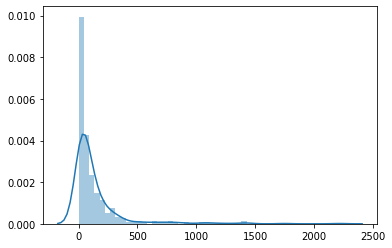

In [67]:
se.distplot(word_count)

## majority of the emails are less than 500 words. This gonna be the limit of the texts we will use for the next phase.

## Gebrish Dataset

In [68]:
gebdf = pd.read_csv('datasets/Gibberish.csv', encoding= 'unicode_escape')

gebdf.head()

,Response,Label
0,ggg,1
1,hgghghghghghghhg,1
2,ufdhgjndfnvbhfdjvnjkmfgbdfg,1
3,dbdbdbd,1
4,dfgdfgd,1


In [69]:
gebdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Response  3767 non-null   object
 1   Label     3767 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.0+ KB


In [70]:
gebdf['Response'][0]

'ggg'

In [71]:
word_count = list()
for row in gebdf.iterrows():
    word_count.append(len(row[1][0].split()))
#     print(row[1][0])
#     break

In [72]:
gebdf['counts'] = word_count

gebdf.head()

,Response,Label,counts
0,ggg,1,1
1,hgghghghghghghhg,1,1
2,ufdhgjndfnvbhfdjvnjkmfgbdfg,1,1
3,dbdbdbd,1,1
4,dfgdfgd,1,1


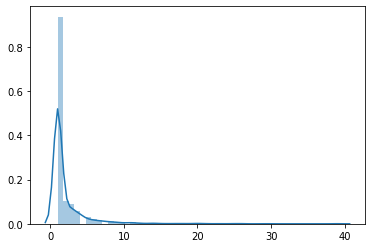

In [73]:
#checking the word counts per each row, we will only consider gebrish words of one
se.distplot(word_count)

In [74]:
gebdf = gebdf.loc[gebdf['counts'] ==1] #select only rows on single word

In [75]:
np.random.randint(0, high=len(gebdf), size=500) # sample of generating gebrish statement randomly

array([2109,  294,  999,  457, 2334,  550, 1889, 2346, 1677,  479, 2244,
       1170, 1712, 2551,    4, 2107, 1233, 1982, 1652, 1458,  289, 2023,
       1752, 1310, 1540, 1192,  912,    1, 1575, 2293, 1549, 1737,  451,
       1880, 1629, 1987, 1256, 2494, 2603, 1181,  853, 1950,  556,  459,
        591, 1568,  665,  129,  219, 1605, 1590,   39,  125,  593,  442,
        670,  234, 2106,  103, 1570, 1633, 1096, 2194,  107,  495,  348,
        830, 2179,  575,  729, 1264, 2105,  229,   87, 2074, 1298, 1699,
        154, 1694, 1816,  521,  556, 1083, 2062, 1818, 1355,  425,  732,
        224,  816, 2599, 1759,  648, 1649,  545, 1164,  371, 1237, 1965,
       2552, 2519, 2525,  223, 1530, 1721, 1578, 2467, 1213, 1952, 2501,
       1638,  436,  902, 1407,  590, 1712,  761,  730,  553, 1829, 2157,
       1593, 1320, 1286, 2164, 2436, 2304, 1068, 1891, 1294, 1899,  701,
       1498, 1386, 1202,   46, 2407,  407, 2132, 1052, 1220,  353,  677,
       1963, 1835,  673, 1455,  238, 2591,  871, 21

In [76]:
len(gebdf)

2678

In [77]:
# drop old index and set new
gebdf = gebdf.reset_index(drop=True)

In [78]:
gebphrase = list()
for i in np.random.randint(0, high=len(gebdf), size=500):
    gebphrase.append(gebdf['Response'][i])
print(len(' '.join(gebphrase).split()))

500


In [79]:
gebphrase = list()
gebcolumn = list()
for phrase in range(0,1000):
    for i in np.random.randint(0, high=len(gebdf), size=500):
        gebphrase.append(gebdf['Response'][i])
    gebcolumn.append(' '.join(gebphrase))
    del gebphrase[:] # this is important to avoid commulative overloading the list 

In [80]:
len(gebcolumn)

1000

In [81]:
gebcolumn[498]

"nnnnnnnnnn gfrds fdnhfyjn sdanjkfyhd dfyhfgguky dfgdfg uuobn mmmmmmmmmmmm gfdx fzdghashyuserysreyeryswer Fhj Hdhxbxbxjxkxk fdgdgf ffffffff fbfgncfg grghrgbggrrgbrgbrgbrtrgbrgbrgbrgrgbrtbrgbrybrybrybrybtyhtyh zsuwwhssh hyrfyy cvbnfghfgjfg k ghjkyhjhkjh swtyestyd tr hdhghfghfgh yrtytryrtytr adasdasd nnnnnnnnnnn fgbdgfrgrfgrfgrfgr fgdfdg wesdfghjk jkgjbh fasdfgag vjbfpivbpdifj piogufyt w ndsljcnsdcjnsd kjhkjh aaaaaaaaaaa fhjgbkn jkhjmhygutytrtrt utugkgigigig cvzsdtdfgbfutfghngfdkhgmj hdhshsjzbx Tgtgthujjjjjuhh dwadwadwadwadwa twetet dfgdfgewrtretdfgfgdfgdfgdfgdfg mjuwwwoldjeyyddjjjzbxbdxvhshssh monjoluj ghgg jhlkjhblkjn jkhmtrg jkhredwsdfghjk zerxtcrytuyi twetet dwadwadw xx aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa erwo mmmmmmmmmmmm gbsfdgsg fchjtyut asdkryhstayayyy gfrds setgsets jjkl;kl;kl;kl;kl;kl;kl; dthjhdf retretert sfdgbvrthbth x hgffhhgghghfhfg yessss hdhghfghfgh ererqewrrwe ;lml; ufdhgjndfnvbhfdjvnjkmfgbdfg Djsjz sdanjkfyhd fgtrghregerg ..... dfghjgjdsf

In [85]:
# ???? what is this shit
print(len(' '.join(gebcolumn[498].split(' '))))

5656


In [86]:
len(gebcolumn[498].split())

500

In [87]:
word_count = list()
for phrase in gebcolumn:
    word_count.append(len(phrase.split()))

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


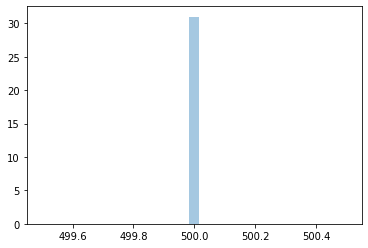

In [88]:
se.distplot(word_count)

# Google 10k words list
https://github.com/first20hours/google-10000-english

In [89]:
wordlist = list()
wordfile = open("datasets/google-10000-english-usa.txt", "r")
for word in wordfile:
    wordlist.append(word)
wordfile.close()
print(word)

poison


In [90]:
# generate random sentence
np.random.randint(0, high=len(wordlist), size=500)

array([9872, 2020, 8405, 4404, 4339, 4460, 7478, 1320, 1594, 5142, 6934,
       6056, 2778, 7342, 7401, 4291, 4787, 1757, 9455, 9044, 1482, 8965,
       1939,  702, 1433, 4229,  345, 3692, 5246, 9443, 5302, 1197, 7653,
       9779, 5714, 4859, 6052, 3960, 6022, 9552, 3475, 4288, 2580,  547,
       4249, 5219, 6932, 2020, 1481, 5562, 2543, 8899,  405,  813, 9534,
       7111, 4832, 2770,  574, 8230, 9185, 6932, 4394, 7919, 5074, 5442,
       7405, 5481,  606, 4435, 6633, 7632,  376, 1626, 1010, 3418, 7532,
       2791, 2624, 8441, 1812, 3096, 2560, 1078, 3626, 2911, 5383, 6566,
       7700, 6113, 4245, 5639, 8366, 4940, 1658, 2899, 2521, 5212, 6535,
       1137,  918, 7403, 5577,  441, 2552, 5501, 3380, 8623, 2517, 2097,
       6804, 6971, 2034, 2494,  654, 2610, 7494, 3922, 8055, 6043, 8447,
        582, 2840, 3900, 5675,  299, 2469, 8293, 5467, 7913, 4889, 9892,
       1803,   36, 3290, 2388, 9410, 5947,  281, 4952, 2676, 9775, 7188,
        791,  209, 5857, 7462, 1989, 2063, 2866, 63

In [91]:
wordphrase = list()
for i in np.random.randint(0, high=len(wordlist), size=500):
    wordphrase.append(wordlist[i].rstrip())
print(' '.join(wordphrase))
print(len(wordphrase))

bl athletics utilization define towns precipitation occasions pod perceived spoken failures cry casting end disability possess paso toy hack linear studied apartments mart views ended ears refine three remember perry stripes specializing addition brother vacation ground double flip near milfhunter transcripts attacked lies shed dies folders bryan monthly physical different sharp prevent invest machine rank registration hiv similarly sql switzerland cm seekers geology basis christine naughty fixed approximate bet items material rss nominations ghz spare guides duke dutch derby ram scale transportation senator markets blocking ensures exist flesh carol used tools finishing madison serum institute sucks object another ibm tuition donated aluminium resolved teenage compaq responsibility citizenship filme mpg danny enlargement hungary join kennedy fr excluding conviction tales synthesis zealand demo girl family utilities prisoner beaver autumn acm tf cinema dicke fraser nipples partnerships

In [92]:
wordphrase = list()
wordcolumn = list()
for phrase in range(0,1000):
    for i in np.random.randint(0, high=len(wordlist), size=500):
        wordphrase.append(wordlist[i].rstrip())
    wordcolumn.append(' '.join(wordphrase))
    del wordphrase[:] # this is important to avoid commulative overloading the list 

In [93]:
print(wordcolumn[9])
print(len(wordcolumn[9].split(' ')))

jacob tier quoted reproduction guam collecting hindu turns shown edited centered broader arthritis seriously emissions noble wikipedia mat visits ware radio palestine feeling milk annie sort adjust catering poem reasoning iii appendix raymond yn tones impaired madness ef statistical forces considers joshua along coordination delayed night grammar co nascar bear sharp invited microsoft tennis md daily assisted ci ssl andale trunk installing james variable like assessment boc wild allows rod sky tremendous expect expedia rip valuation enb victim sexually closest sec discover forget substitute inspector la lycos comments courier cart planet strike confidential sizes urge paths sites geneva postcards filled generic thermal subsidiary studio excellence coding sn kill vc reports exceptional phrase we respect webster nonprofit homework tigers aaa brooks fabrics retail ericsson rough ends utils timeline illegal am road allied container ellis cs adults tagged inserted validity basin brothers pa

In [94]:
len(wordcolumn)

1000

In [95]:
len(wordcolumn[9].split(' '))

500

In [96]:
# amzon reviews dataset

amadf = pd.read_csv('datasets/amazon review sample.csv')

amadf.head()

,Unnamed: 0,Response,Label
0,0,The best soundtrack ever to anything.: I'm rea...,0
1,1,Amazing!: This soundtrack is my favorite music...,0
2,2,Excellent Soundtrack: I truly like this soundt...,0
3,3,"Remember, Pull Your Jaw Off The Floor After He...",0
4,4,an absolute masterpiece: I am quite sure any o...,0


# Class types amalgamation
## Clean data class {amazon reviews, emails}

In [97]:
emaildf.head()

,Unnamed: 0,file,message,email_body
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes th...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the sal..."
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


In [98]:
emaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   file        1000 non-null   object
 2   message     1000 non-null   object
 3   email_body  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [107]:
emaildf['Response'] = emaildf['email_body']
emaildf['Label'] = 0

In [108]:
emailspart = emaildf[['Response', 'Label']]
emailspart.head()

,Response,Label
0,Here is our forecast,0
1,Traveling to have a business meeting takes th...,0
2,test successful. way to go!!!,0
3,"Randy, Can you send me a schedule of the sal...",0
4,Let's shoot for Tuesday at 11:45.,0


In [109]:
reviewspart = amadf[['Response', 'Label']]

reviewspart.head()

,Response,Label
0,The best soundtrack ever to anything.: I'm rea...,0
1,Amazing!: This soundtrack is my favorite music...,0
2,Excellent Soundtrack: I truly like this soundt...,0
3,"Remember, Pull Your Jaw Off The Floor After He...",0
4,an absolute masterpiece: I am quite sure any o...,0


In [110]:
cleanclass = pd.concat([emailspart, reviewspart], ignore_index=True)
cleanclass.head()

,Response,Label
0,Here is our forecast,0
1,Traveling to have a business meeting takes th...,0
2,test successful. way to go!!!,0
3,"Randy, Can you send me a schedule of the sal...",0
4,Let's shoot for Tuesday at 11:45.,0


In [111]:
cleanclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Response  2000 non-null   object
 1   Label     2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


## Dirty data class {gibberish, wordlist}

In [112]:
print(len(wordcolumn))
print(len(gebcolumn))

1000
1000


In [113]:
alltext = wordcolumn + gebcolumn
dirtyclass = pd.DataFrame()

dirtyclass['Response'] = alltext
dirtyclass['Label'] = 1

dirtyclass.head()

,Response,Label
0,wait player chemical treasures aspects designe...,1
1,loss rwanda protection postcards nightmare gpl...,1
2,fires permissions tennis flow secure lets urba...,1
3,apparently teddy understand cd xerox refers ol...,1
4,renew enabled relating kijiji hiring accomplis...,1


In [114]:
dirtyclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Response  2000 non-null   object
 1   Label     2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


# Creation of dataset

In [115]:
dataset = pd.concat([cleanclass, dirtyclass], ignore_index=True)
dataset.head()

,Response,Label
0,Here is our forecast,0
1,Traveling to have a business meeting takes th...,0
2,test successful. way to go!!!,0
3,"Randy, Can you send me a schedule of the sal...",0
4,Let's shoot for Tuesday at 11:45.,0


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Response  4000 non-null   object
 1   Label     4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


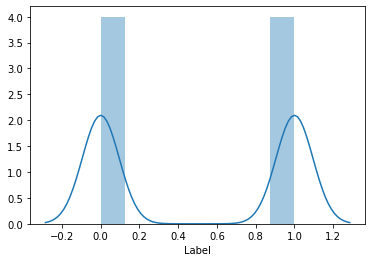

In [117]:
#check class distribution
se.distplot(dataset['Label'])

In [118]:
dataset.to_csv('datasets/synthatic dataset.csv')